In [31]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

In [32]:
from data_augmentation_utils import shift, stretch, pitch_shift, add_noise

X = torch.load('waveform_ds/X_test.pt')
y = np.loadtxt('waveform_ds/y_test.txt', dtype=str)

## Original sounds

In [45]:

def multiple_plots(x, y, figsize=(15, 15)):
    fig, axs = plt.subplots(5, 5, figsize=(15, 15)) 
    for i in range(25):
        sns.lineplot(x=np.arange(len(x[i])), y=x[i], ax=axs[i//5, i%5], color='navy')
        axs[i//5, i%5].set_title(y[i])
        if i%5 == 0:
            axs[i//5, i%5].set_ylabel('Amplitude')
        else:
            axs[i//5, i%5].set_ylabel('')
            axs[i//5, i%5].set_yticklabels([])
        if i//5 == 4:
            axs[i//5, i%5].set_xlabel('Sample id')
        else:
            axs[i//5, i%5].set_xlabel('')
            axs[i//5, i%5].set_xticklabels([])

    # save
    import os
    if not os.path.exists('plots'):
        os.makedirs('plots')

    plt.savefig('plots/waveform_ds.png', bbox_inches='tight')

def single_plot (x, y, figsize=(7, 4)):
    fig, ax = plt.subplots(figsize=figsize)
    sns.lineplot(x=np.arange(len(x)), y=x, ax=ax, color='navy')
    ax.set_title(y)
    ax.set_ylabel('Amplitude')
    ax.set_xlabel('Time')

    # save
    


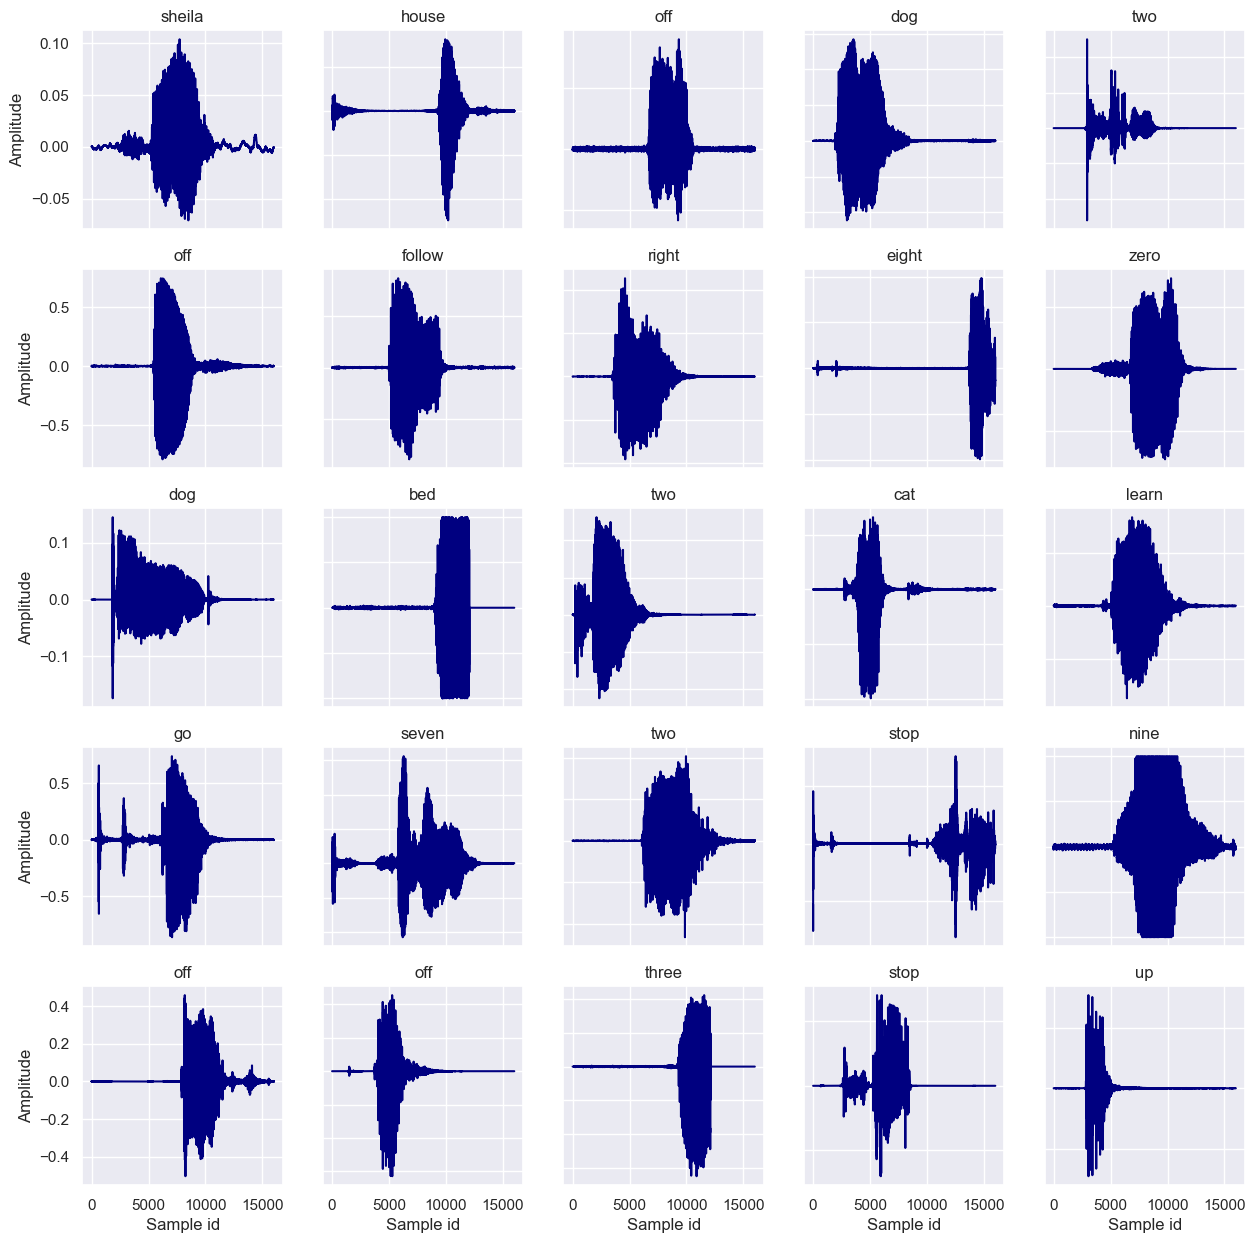

In [46]:
multiple_plots(X, y)

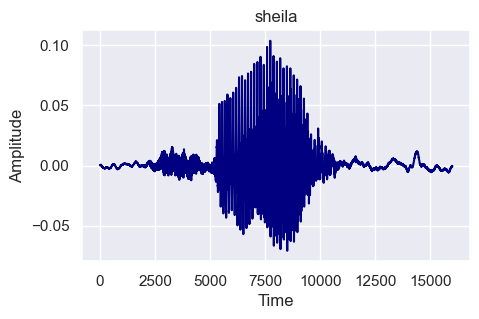

In [47]:
single_plot(X[0], y[0], figsize=(5, 3))

## noise 

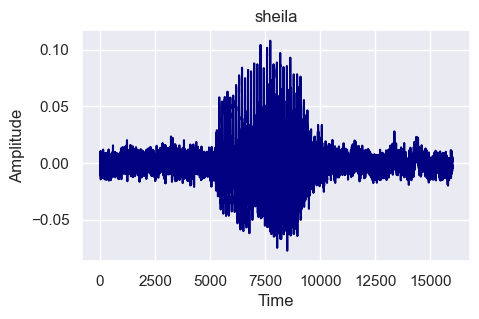

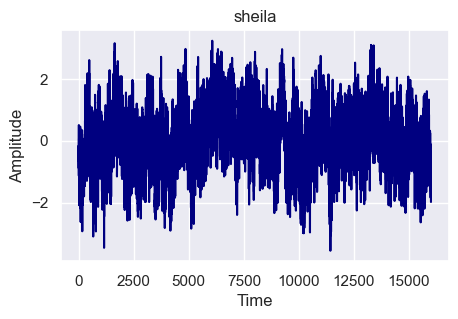

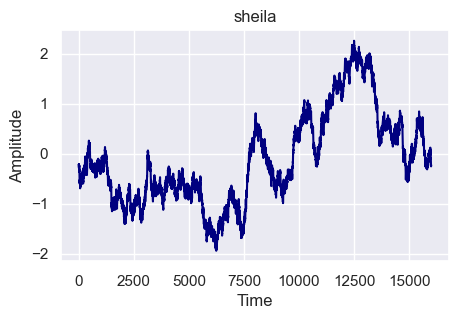

In [48]:
# white noise
x_wn = add_noise(X[0], 0.005)
single_plot(x_wn, y[0], figsize=(5, 3))

# pink noise
x_pn = add_noise(X[0], 0.0005, noise_type='pink')
single_plot(x_pn, y[0], figsize=(5, 3))

# brown noise
x_bn = add_noise(X[0], 0.05, noise_type='brown')
single_plot(x_bn, y[0], figsize=(5, 3))



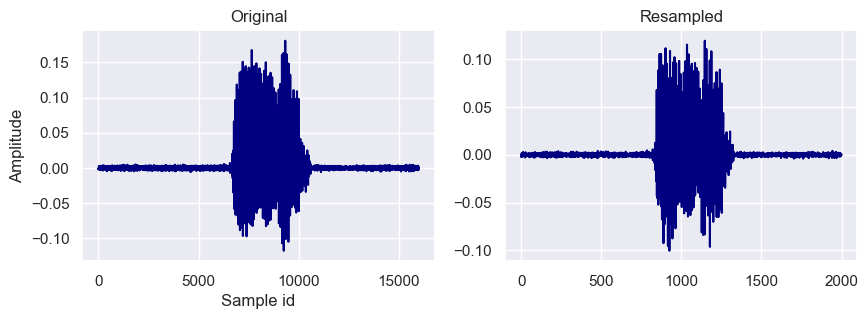

In [54]:
original = X[2]
from scipy.signal import resample
resampled = resample(original, 2000)


fig, axs = plt.subplots(1, 2, figsize=(10, 3))
sns.lineplot(x=np.arange(len(original)), y=original, ax=axs[0], color='navy')
axs[0].set_title('Original')
sns.lineplot(x=np.arange(len(resampled)), y=resampled, ax=axs[1], color='navy')
axs[1].set_title('Resampled')
axs[0].set_ylabel('Amplitude')
axs[0].set_xlabel('Sample id')
plt.savefig('plots/resample.png', bbox_inches='tight')



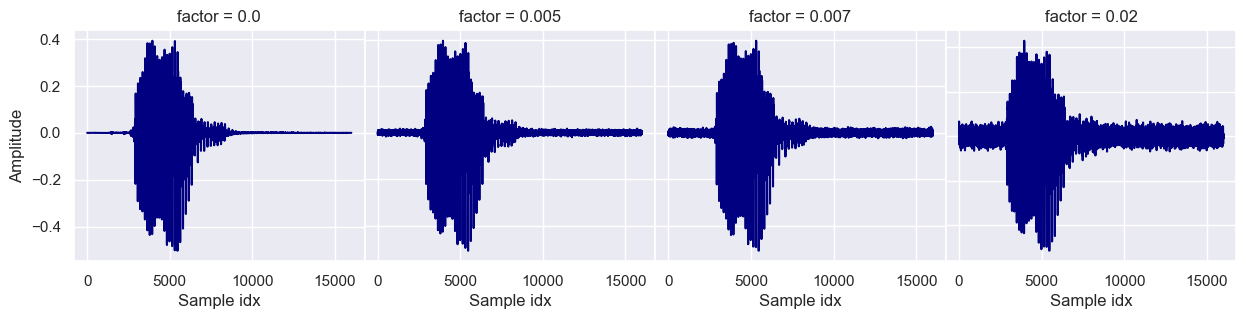

In [56]:
# different levels of white noise
factors = [0.00, 0.005, 0.007, 0.02,]
original = X[30]
x_wn = [add_noise (original, factor) for factor in factors]

fig, axs = plt.subplots(1, 4, figsize=(15, 3))
for i in range(4):
    sns.lineplot(x=np.arange(len(x_wn[i])), y=x_wn[i], ax=axs[i], color='navy')
    axs[i].set_title('factor = {}'.format(factors[i]))
    axs[i].set_ylabel('Amplitude')
    axs[i].set_xlabel('Sample idx')
    if i > 0:
        axs[i].set_ylabel('')
        axs[i].set_yticklabels([])
    # remove space between subplots
fig.subplots_adjust(wspace=0)
# add title
fig.savefig('plots/white_noise.pdf', bbox_inches='tight')


In [50]:
# shift
x_shift = shift(X[0], shift_size=10, shift_direction='both')
single_plot(x_shift, y[0], figsize=(5, 3))


TypeError: shift() got an unexpected keyword argument 'shift_size'

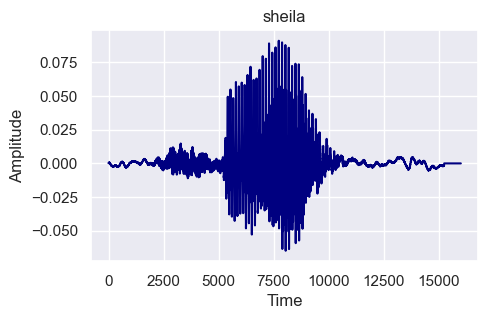

In [55]:
# stretch
x_stretch = stretch(X[0], rate=1.05)
single_plot(x_stretch, y[0], figsize=(5, 3))

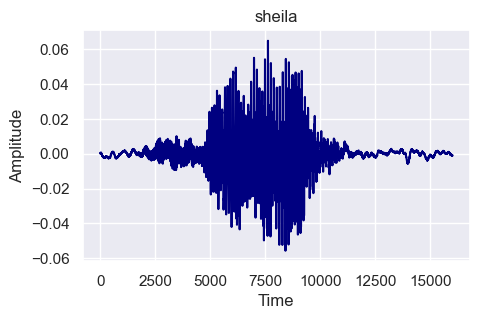

In [57]:
# pitch shift
x_pitch = pitch_shift(X[0], 10, pitch_factor=1.5)
single_plot(x_pitch, y[0], figsize=(5, 3))

In [23]:
import tensorflow as tf
input = tf.keras.Input(shape=(100,), dtype='int32', name='input')
x = tf.keras.layers.Embedding(
    output_dim=512, input_dim=10000, input_length=100)(input)
x = tf.keras.layers.LSTM(32)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
output = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(x)
model = tf.keras.Model(inputs=[input], outputs=[output])
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


<Axes: >

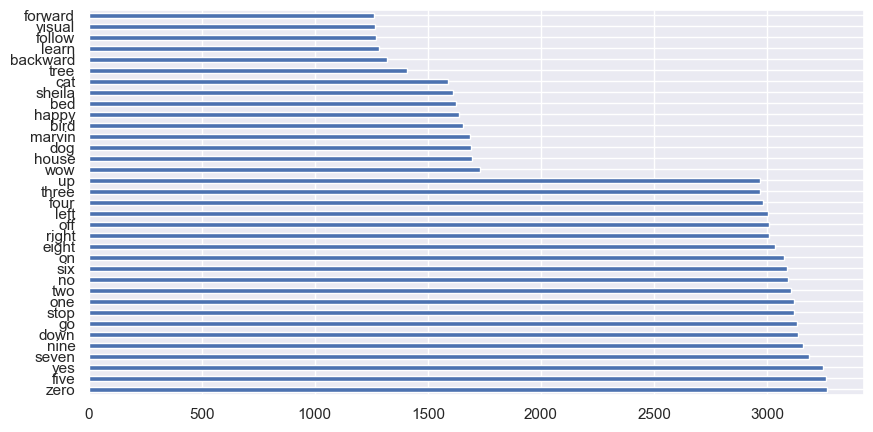

In [30]:
y = np.loadtxt('waveform_ds/y_train.txt', dtype=str)
import pandas as pd

y = pd.Series(y)
y.value_counts().plot(kind='barh', figsize=(10, 5))


array(['seven', 'go', 'five', ..., 'zero', 'five', 'bed'], dtype='<U8')